<a href="https://colab.research.google.com/github/DINESHDHAKAR1/MLProject/blob/main/MNIST_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
device = torch.device('cpu')
input_size =784
hidden_size = 500
num_classes = 10
num_epochs =2
batch_size = 100
learning_rate = 0.001

In [ ]:
train_dataset = torchvision.datasets.MNIST( root= 'data',train= True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST( root= 'data',train= False,transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 115287934.13it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33780171.17it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 31557509.84it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3792659.52it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
example_data,example_target = next(iter(test_loader))

In [ ]:
example_data[0]

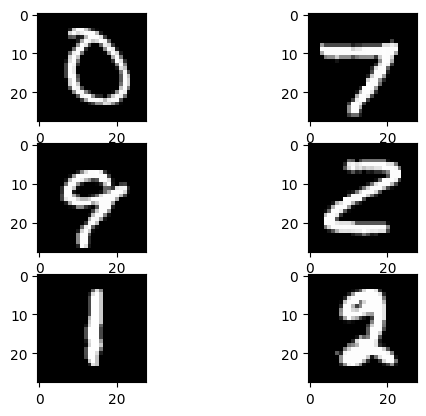

In [ ]:
for i in range (6):
  plt.subplot(3,2,i+1)
  plt.imshow(example_data[i][0],cmap='gray')
plt.show ()

In [ ]:
class Nural_Network(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
        super(Nural_Network,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU
        self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
      out = self.l1(x)
      out = self.relu(out)
      out = self.l2(out)
      return out


In [ ]:
modal = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 100),
    nn.ReLU(),
    nn.Linear(100,num_classes),

).to(device)

In [ ]:
#model = Nural_Network(input_size,hidden_size,num_classes).to(device)

In [ ]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modal.parameters(),lr=learning_rate)

In [ ]:
n_steps = len(train_loader)
for epoch in range (num_epochs) :
  train_loss =0
  for i ,(image,labels) in enumerate(train_loader) :
    image = image.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = modal(image)
    loss = criteria(outputs,labels)
    train_loss +=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1)%100 ==0 :
      print(f"Epoch[{epoch+1/num_epochs}],step[{i+1/n_steps}],Loss:{train_loss}")

Epoch[0.5],step[99.00166666666667],Loss:69.48849487304688
Epoch[0.5],step[199.00166666666667],Loss:99.91278839111328
Epoch[0.5],step[299.00166666666667],Loss:123.55944061279297
Epoch[0.5],step[399.00166666666667],Loss:143.9983367919922
Epoch[0.5],step[499.00166666666667],Loss:159.1857452392578
Epoch[0.5],step[599.0016666666667],Loss:174.0927734375
Epoch[1.5],step[99.00166666666667],Loss:12.485660552978516
Epoch[1.5],step[199.00166666666667],Loss:22.77907371520996
Epoch[1.5],step[299.00166666666667],Loss:33.461360931396484
Epoch[1.5],step[399.00166666666667],Loss:43.567073822021484
Epoch[1.5],step[499.00166666666667],Loss:53.464378356933594
Epoch[1.5],step[599.0016666666667],Loss:63.182437896728516


In [ ]:
with torch.no_grad():
  n_correct =[]
  test_loss = 0
  n_sam = len(test_loader.dataset)
  for i ,(image,labels) in enumerate(train_loader):
    image = image.reshape(-1,28*28).to(device)
    labels =labels.to(device)
    output = modal(image)
    loss = criteria(output,labels)
    test_loss += loss
    n_correct = torch.softmax(output.squeeze(), dim=0)
    #n_correct.append(n_correct)
  print(n_sam)
  print(n_correct.shape)
  print(n_correct[1])
  print(labels[1])

10000
torch.Size([100, 10])
tensor([3.2011e-06, 1.6186e-08, 8.7469e-07, 1.7481e-07, 3.8770e-08, 1.2056e-06,
        3.2571e-08, 1.1062e-09, 3.1871e-02, 1.1292e-05])
tensor(8)


In [ ]:
  print(n_correct[50])
  print(labels[50])

tensor([2.6479e-09, 2.8214e-03, 1.3379e-01, 9.2071e-06, 9.2399e-10, 1.1861e-06,
        4.0207e-09, 2.6675e-06, 7.2618e-07, 1.0970e-08])
tensor(2)


In [ ]:
print(test_loss)

tensor(39.7207)


In [ ]:
pred_classes = n_correct.argmax(dim=1)
pred_classes

tensor([7, 8, 2, 8, 7, 2, 8, 8, 1, 1, 9, 0, 6, 9, 0, 1, 6, 8, 3, 6, 3, 3, 6, 5,
        2, 4, 0, 4, 9, 9, 3, 1, 3, 1, 2, 3, 3, 6, 6, 9, 4, 8, 4, 9, 5, 8, 2, 0,
        7, 7, 2, 4, 6, 9, 5, 8, 2, 7, 3, 5, 5, 5, 4, 6, 3, 1, 0, 4, 2, 2, 7, 1,
        3, 8, 2, 7, 7, 1, 8, 3, 7, 7, 4, 8, 8, 0, 5, 6, 8, 1, 5, 5, 1, 1, 2, 0,
        1, 7, 6, 1])

In [ ]:
print(labels)

tensor([7, 8, 2, 8, 7, 7, 8, 8, 1, 1, 9, 0, 6, 9, 0, 1, 6, 7, 3, 6, 3, 3, 6, 5,
        2, 4, 0, 4, 9, 9, 3, 1, 3, 1, 2, 3, 3, 6, 6, 9, 4, 8, 4, 9, 5, 8, 2, 0,
        7, 7, 2, 4, 6, 9, 5, 8, 2, 7, 3, 5, 5, 5, 4, 6, 3, 1, 0, 4, 2, 2, 7, 1,
        3, 8, 2, 7, 7, 1, 8, 3, 7, 7, 4, 8, 8, 0, 5, 6, 8, 1, 5, 5, 1, 1, 2, 0,
        1, 7, 6, 1])


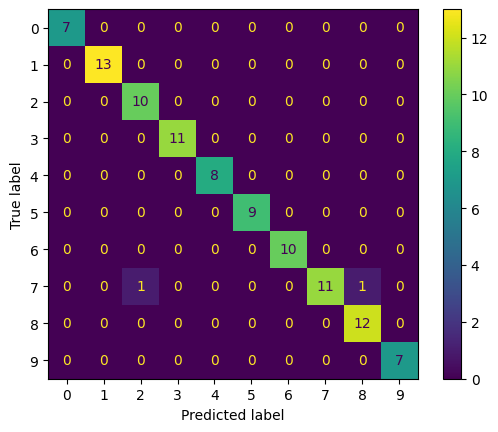

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(labels, pred_classes)
ConfusionMatrixDisplay(cm).plot()